# Breast Cancer Classifier

In [27]:
# import libraries
import pandas as pd # for data manupulation or analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

# Data Load

In [3]:
#Load breast cancer dataset
df = pd.read_csv('data.csv')

# Data Manipulation

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# keys in dataset
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# malignant or benign value
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [7]:
# Information of cancer Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Numerical distribution of data
df.describe() 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data Visualization

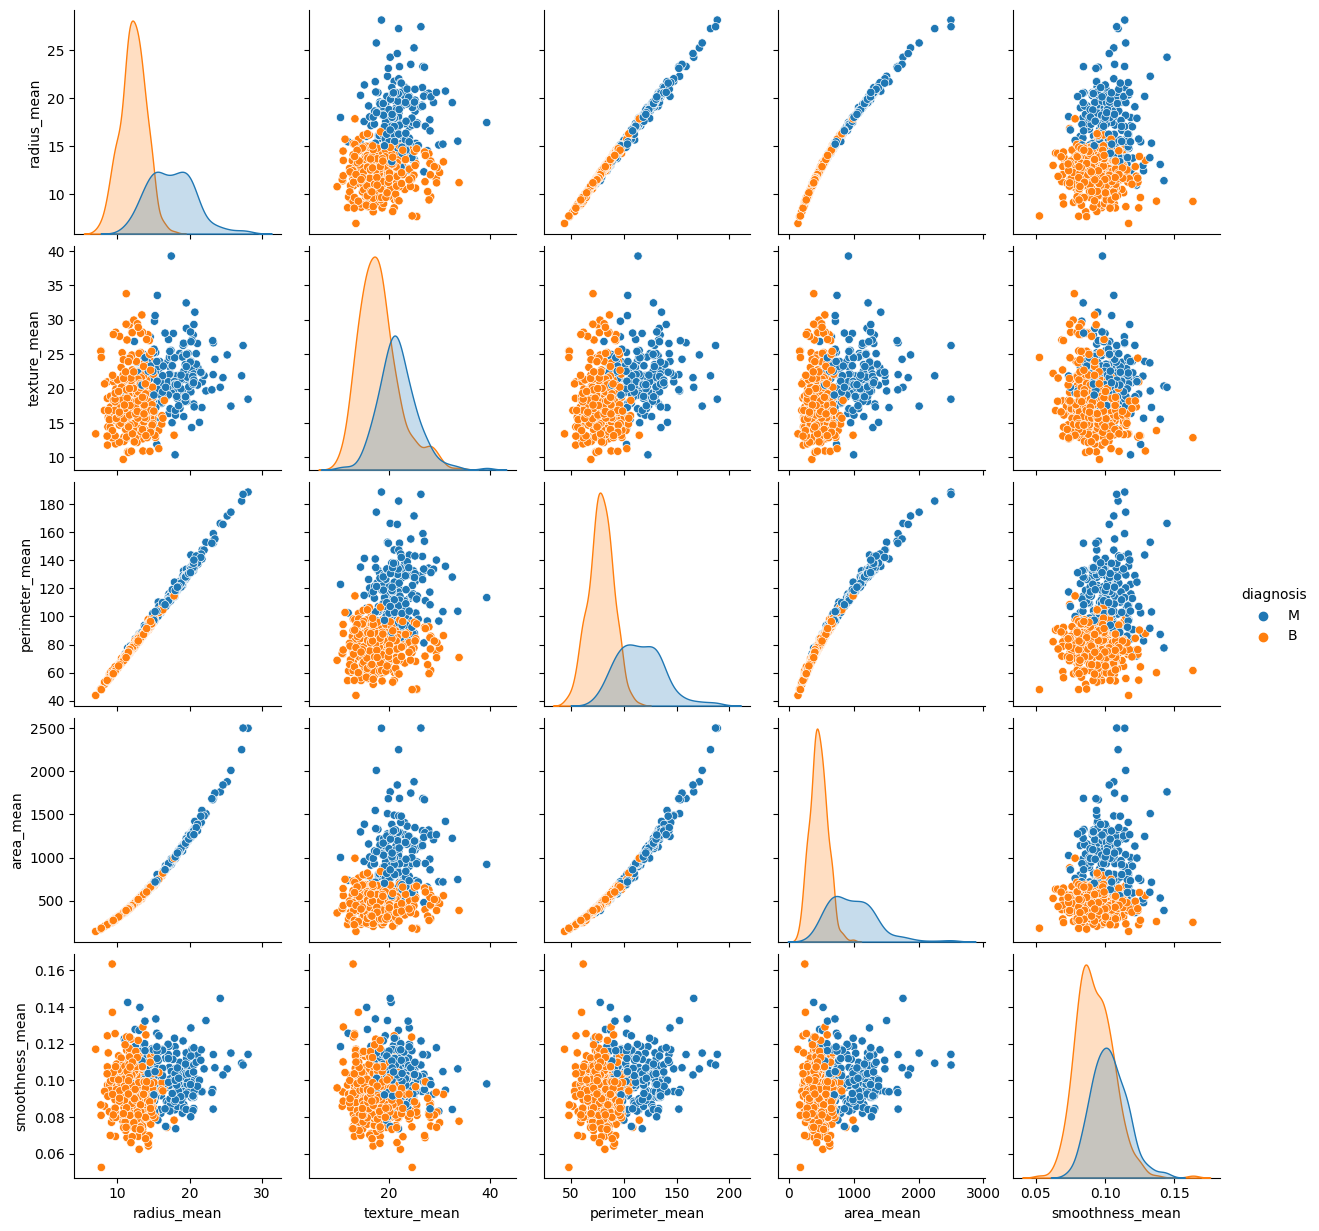

In [10]:
# pair plot of sample feature
sns.pairplot(df, hue = 'diagnosis',vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'] )

In [26]:
# Count the target class
sns.countplot(df['diagnosis'])

c:\Users\Vansh Arora\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='diagnosis', ylabel='count'>

In [12]:
# counter plot of feature mean radius
sns.countplot(df['radius_mean'])

c:\Users\Vansh Arora\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radius_mean', ylabel='count'>

In [13]:
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(df, explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


In [18]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv("df"))

#Saving results to HTML file
sweet_report.show_html('df')

FileNotFoundError: [Errno 2] No such file or directory: 'df'

In [25]:
import dtale
import pandas as pd

dtale.show(pd.read_csv(df))

TypeError: argument of type 'method' is not iterable

# Split DatFrame in Train and Test

In [ ]:
# create second DataFrame by droping target
features = df.drop(['diagnosis','id'], axis = 1)
target = df['diagnosis']

In [ ]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state= 5)

In [ ]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.18110,0.08698,0.2973,0.07745
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.60300,0.14650,0.2597,0.12000
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.34580,0.15640,0.2920,0.07614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.14110,0.3542,0.27790,0.13830,0.2589,0.10300
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.119800,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.90340,0.19640,0.3245,0.11980
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.4925,0.73560,0.20340,0.3274,0.12520


In [ ]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.1641,0.61100,0.63350,0.20240,0.4027,0.09876
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.17880,0.25600,0.12210,0.2889,0.08006
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.16670,0.12120,0.05614,0.2637,0.06658
549,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
515,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.1483,0.15740,0.16240,0.08542,0.3060,0.06783
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300


In [ ]:
y_train

306    B
410    B
197    M
376    B
244    M
      ..
8      M
73     M
400    M
118    M
206    B
Name: diagnosis, Length: 455, dtype: object

In [ ]:
y_test

28     M
163    B
123    B
361    B
549    B
      ..
414    M
515    B
186    M
3      M
261    M
Name: diagnosis, Length: 114, dtype: object

# Feature scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Machine Learning Model Building

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

## Support vector Classifier

In [ ]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.9385964912280702

In [ ]:
# Train with Standard scaled Data
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.9649122807017544

# Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\Kush Garg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.956140350877193

In [ ]:
# Train with Standard scaled Data
lr_classifier2 = LogisticRegression()
lr_classifier2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_lr_sc)

0.9736842105263158

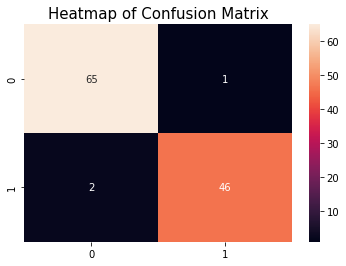

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr_sc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# K – Nearest Neighbor Classifier

In [ ]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

C:\Users\Kush Garg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9385964912280702

In [ ]:
# Train with Standard scaled Data
knn_classifier2 = KNeighborsClassifier()
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.9649122807017544

# Naive Bayes Classifier

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.9473684210526315

In [ ]:
# Train with Standard scaled Data
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.9385964912280702

# Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9473684210526315

In [ ]:
# Train with Standard scaled Data
dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.9649122807017544

 # Random Forest Classifier

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9736842105263158

In [ ]:
# Train with Standard scaled Data
rf_classifier2 = RandomForestClassifier()
rf_classifier2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.9649122807017544

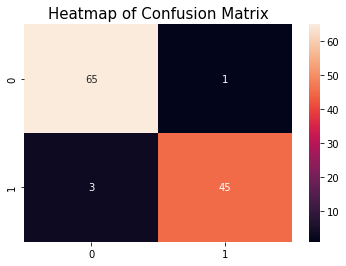

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_sc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# AdaBoost Classifier

In [ ]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train, y_train)
y_pred_adb = adb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_adb)

C:\Users\Kush Garg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.9736842105263158

In [ ]:
# Train with Standard scaled Data
adb_classifier2 = AdaBoostClassifier()
adb_classifier2.fit(X_train_sc, y_train)
y_pred_adb_sc = adb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_adb_sc)

0.9736842105263158

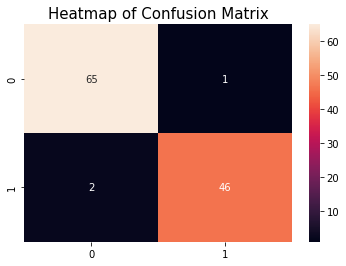

In [ ]:
cm = confusion_matrix(y_test, y_pred_adb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

#### Conclusion :- Logistics Regression, Random Forest Classifier and AdaBoost Classifier gives best Accuracy of 97.36%

# Save AdaBoost Classifier model using Pickel

In [ ]:
## Pickle
import pickle

# save model
pickle.dump(adb_classifier2, open('breast_cancer_detector.pickle', 'wb'))

# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

# predict the output
y_pred = breast_cancer_detector_model.predict(X_test_sc)

# confusion matrix
print('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of XGBoost model = ',accuracy_score(y_test, y_pred))

Confusion matrix of XGBoost model: 
 [[65  1]
 [ 2 46]] 

Accuracy of XGBoost model =  0.9736842105263158
